In [2]:
# !pip3 install hazm
!pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 5.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras import layers
from keras.backend import clear_session

In [8]:
unprocessed_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Sentiment Analysis (NLP Project)/sentipers.xlsx')
unprocessed_df = unprocessed_df[['text', 'polarity']]

In [9]:
unprocessed_df.head()

,text,polarity
0,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...,0
1,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...,0
2,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...,0
3,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...,0
4,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,2


In [10]:
texts = unprocessed_df['text'].tolist()
polarity = unprocessed_df['polarity'].tolist()

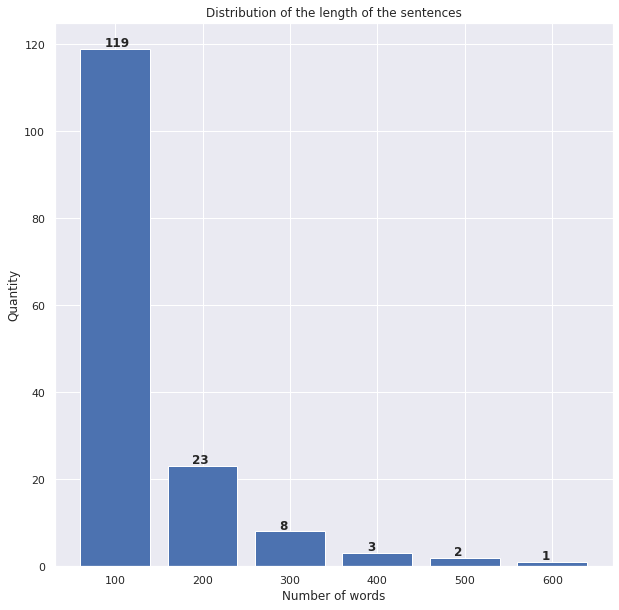

In [77]:

texts_length_dict = {}
lens = [len(each.split(' ')) for each in texts]

for i in range(6):
    border = (i + 1) * 100
    texts_length_dict[str(border)] = len([each for each in lens if each >= border])

names = list(texts_length_dict.keys())
values = list(texts_length_dict.values())

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.bar(names, values)
ax.set_title('Distribution of the length of the sentences') 
ax.set_xlabel('Number of words') 
ax.set_ylabel('Quantity')

for i, v in enumerate(values):
    ax.text(i - .12, v + .55, str(v), fontweight='bold')

In [99]:
def plot_bar(target, detailed=False):

    fig, ax = plt.subplots(figsize=(8, 8)) 
    data = target.value_counts() 
    classes = data.index 
    frequency = data.values

    ax.bar(classes, frequency) 
    ax.set_title('Sentiments with Frequency') 
    ax.set_xlabel('Sentiments') 
    ax.set_ylabel('Frequency')

    if detailed:
        for i in range(len(frequency)):
            ax.text(classes[i] - .22, frequency[i] + .75, str(frequency[i]), fontweight='bold')

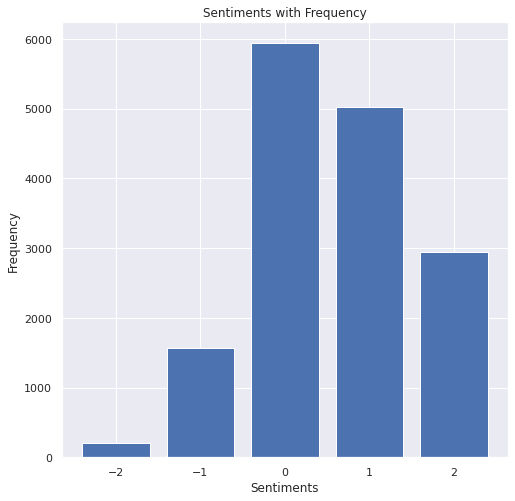

In [100]:
plot_bar(unprocessed_df['polarity'])

In [14]:
def plot_pie(df, polarity):

    temp = np.unique(polarity)

    df_value_counts = df['polarity'].value_counts()
    data = {'Frequency': [df_value_counts[each] for each in temp]}

    pie_df = pd.DataFrame(data, columns=['Frequency'], index = temp)

    pie_df.plot.pie(y='Frequency', figsize=(12, 12), autopct='%1.1f%%', startangle=90)
    plt.show()

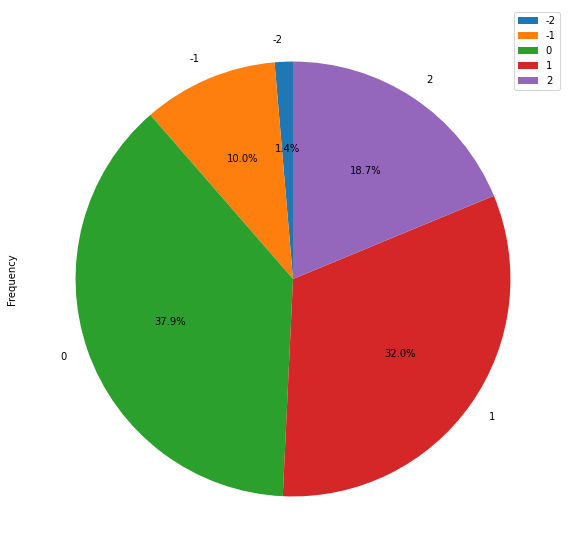

In [15]:
plot_pie(unprocessed_df, polarity)

In [16]:
new_polarity = [i + 2 for i in polarity]

df_dict = {'text': texts, 'polarity': new_polarity}

df = pd.DataFrame(df_dict)
df.head()

,text,polarity
0,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...,2
1,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...,2
2,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...,2
3,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...,2
4,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,4


In [17]:
# from hazm import *

In [18]:
# normalizer = Normalizer()
# stemmer = Stemmer()
# lemmatizer = Lemmatizer()

In [19]:
# normalized_texts = [normalizer.normalize(each) for each in texts]

# stemmed_texts, tmp = [], []

# for each_text in normalized_texts:
#     tmp *= 0
#     tmp = word_tokenize(each_text)
#     for i in range(len(tmp)):
#         tmp[i] = stemmer.stem(tmp[i])
#         # tmp[i] = lemmatizer.lemmatize(tmp[i])
#     stemmed_texts.append(' '.join(tmp))

In [20]:
# print('Amount of texts:', len(texts))
# print(stemmed_texts[0])

In [21]:
# df_dict = {'text':stemmed_texts, 'polarity':new_polarity}

# df = pd.DataFrame(df_dict)
# df.head()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

In [23]:
X, y = df['text'], df['polarity']

In [24]:
tfidf = TfidfVectorizer()
tfidf.fit(X)

X_vect  = tfidf.transform(X).toarray()
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_vect, y)

In [26]:
len(tfidf.vocabulary_)

14105

In [27]:
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)

In [28]:
def train_model(X, x_train, y_train, x_test, y_test, heatmap=True, report=True):

    model = X
    model.fit(x_train, y_train)

    pred_sentiment = model.predict(x_test)

    if report:
        print(classification_report(list(y_test), pred_sentiment))
    
    if heatmap:
        model_matrix = confusion_matrix(list(y_test), pred_sentiment)

        sns.set()
        plt.figure(figsize = (10, 10))

        sns.heatmap(model_matrix.T,
                    square = True,
                    annot = True,
                    fmt = 'd',
                    cbar = False,
                    linewidths = .9,
                    xticklabels = ['-2', '-1', '0', '1', '2'],
                    yticklabels = ['-2', '-1', '0', '1', '2'])

        plt.xlabel('Truth')
        plt.ylabel('Predicted')


              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1187
           1       0.73      0.81      0.77      1188
           2       0.70      0.53      0.60      1188
           3       0.63      0.47      0.54      1187
           4       0.76      0.81      0.78      1188

    accuracy                           0.72      5938
   macro avg       0.71      0.72      0.71      5938
weighted avg       0.71      0.72      0.71      5938



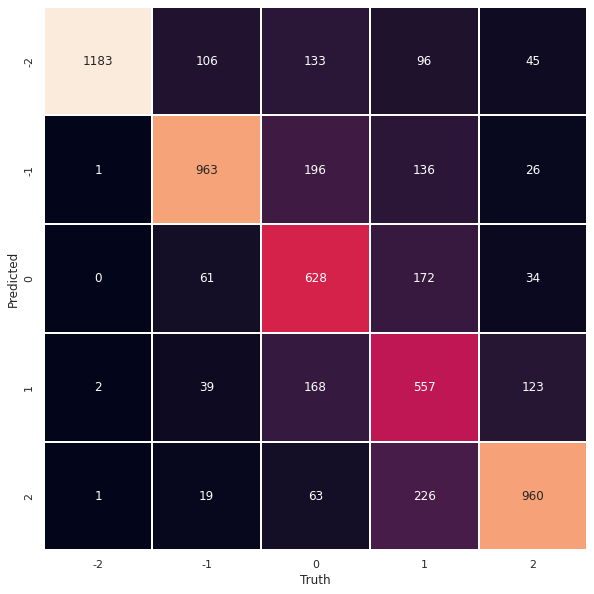

In [29]:
train_model(MultinomialNB(), x_sm_train, y_sm_train, x_sm_test, y_sm_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1187
           1       0.83      0.89      0.86      1188
           2       0.73      0.74      0.74      1188
           3       0.70      0.59      0.64      1187
           4       0.84      0.86      0.85      1188

    accuracy                           0.82      5938
   macro avg       0.81      0.82      0.81      5938
weighted avg       0.81      0.82      0.81      5938



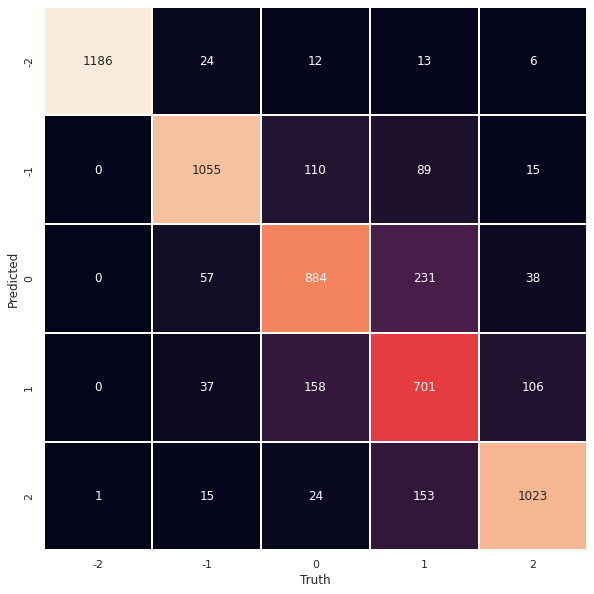

In [30]:
train_model(LogisticRegression(solver='newton-cg', class_weight='balanced'), x_sm_train, y_sm_train, x_sm_test, y_sm_test)

In [31]:
dfs = []
maxleng = (0, 0)

for i in range(len(np.unique(df['polarity']))):
    dfs.append(df[df['polarity'] == i])
    if len(dfs[i]) > maxleng[1]:
        maxleng = i, len(dfs[i])

weights = [int(maxleng[1]/len(i)) for i in dfs]
print(weights)

os_df = dfs[0].copy(deep=True)

for i in range(weights[0] - 1):
    os_df = pd.concat([os_df, dfs[0].copy(deep=True)], ignore_index=True)

for i in range(1, len(dfs)):
    tmp = dfs[i].copy(deep=True)
    for j in range(weights[i] - 1):
        tmp = pd.concat([tmp, tmp.copy(deep=True)], ignore_index=True)
    os_df = pd.concat([os_df, tmp], ignore_index=True)

print(len(os_df))

[10, 3, 1, 1, 2]
25253


In [32]:
X, y = os_df['text'], os_df['polarity']
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(zip(np.unique(y), class_weights))
text_train, text_test, target_train, target_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [33]:
from collections import Counter
 
print(Counter(target_train).items())

dict_items([(4, 4704), (1, 5037), (2, 4750), (0, 1696), (3, 4015)])


In [34]:
# the maximum of the most frequent words we are trying to learn
MAX_WORDS = 9000
# maximum length of each sequences we want to have
MAX_SEQUENCES = 320

# tokenizing and fitting the words to the tokenizer object
keras_tokenizer = Tokenizer(num_words = MAX_WORDS, oov_token="<OOV>")
keras_tokenizer.fit_on_texts(text_train)

# converting texts to sequences of numbers(indices) for the train and test data 
word_index = keras_tokenizer.word_index
vocab_size = len(word_index)
train_sequences = keras_tokenizer.texts_to_sequences(text_train)
train_sequences_padded = pad_sequences(train_sequences, maxlen = MAX_SEQUENCES, padding='post', truncating='post')

test_sequences = keras_tokenizer.texts_to_sequences(text_test)
test_sequences_padded = pad_sequences(test_sequences, maxlen = MAX_SEQUENCES, padding='post', truncating='post')

In [35]:
print(train_sequences_padded.shape)
print(test_sequences_padded.shape)
print(target_train.shape)
print(target_test.shape)

(20202, 320)
(5051, 320)
(20202,)
(5051,)


In [36]:
def int_encoder(arr):

    m = arr.shape[0]
    vector_len = len(np.unique(arr))

    new_arr = np.zeros((m, vector_len))

    for i in range(len(arr)):
        new_arr[i][arr[i]] = 1

    return new_arr


In [37]:
train_sequences_padded = np.array(train_sequences_padded)
target_train_new = int_encoder(np.array(target_train))
# target_train = np.array(target_train)

test_sequences_padded = np.array(test_sequences_padded)
target_test_new = int_encoder(np.array(target_test))
# target_train = np.array(target_train)

In [38]:
print(train_sequences_padded.shape)
print(test_sequences_padded.shape)
print(target_train_new.shape)
print(target_test_new.shape)

(20202, 320)
(5051, 320)
(20202, 5)
(5051, 5)


In [101]:
def make_NN(x_train, y_train, x_test, y_test, vocab_size, class_weights, embedding_dim=64, epochs=25):

    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=MAX_SEQUENCES),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5, activation='softmax')
    ])

    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer = tf.keras.optimizers.Adam(0.0009)
    callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    print()
    history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.25,
                    batch_size=64,
                    class_weight=class_weights,
                    callbacks=[callback])
    

    predicted_texts = model.predict(x_test)

    loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
    print("Training Accuracy: {:.5f}".format(accuracy))
    loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
    print("Testing Accuracy:  {:.5f}".format(accuracy))
    clear_session()

    return history, predicted_texts

In [102]:
hist, pred = make_NN(train_sequences_padded, target_train, test_sequences_padded, target_test, vocab_size, class_weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 320, 64)           1013376   
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

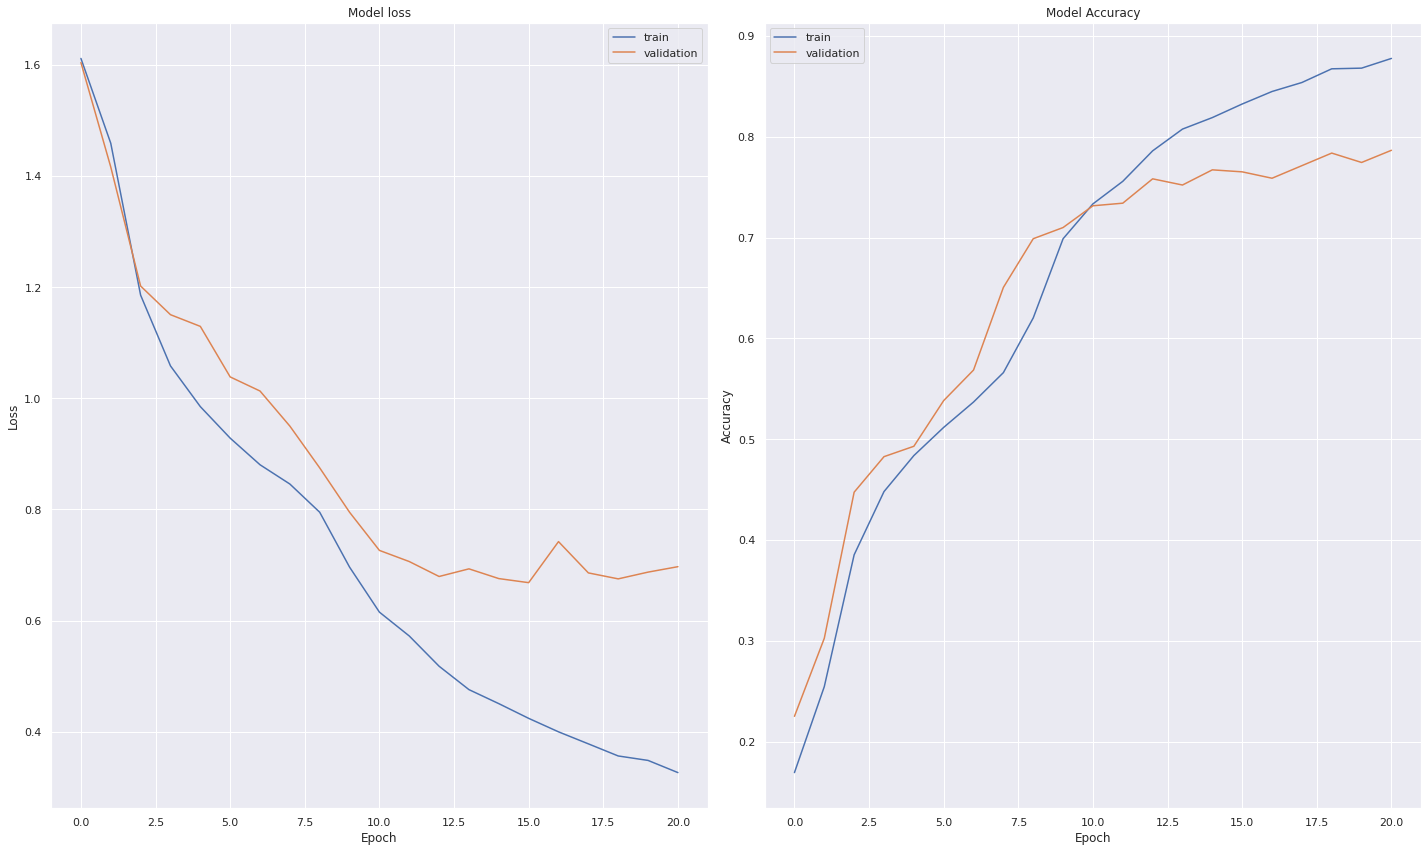

In [103]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 24))

df_loss_acc = pd.DataFrame(hist.history)
df_loss= df_loss_acc[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'}, inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].copy(deep=True)
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'}, inplace=True)

df_loss.plot(ax=ax1, title='Model loss', figsize=(20,12)).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(ax=ax2, title='Model Accuracy',figsize=(20,12)).set(xlabel='Epoch', ylabel='Accuracy')

figure.tight_layout()

Text(122.30000000000001, 0.5, 'Predicted')

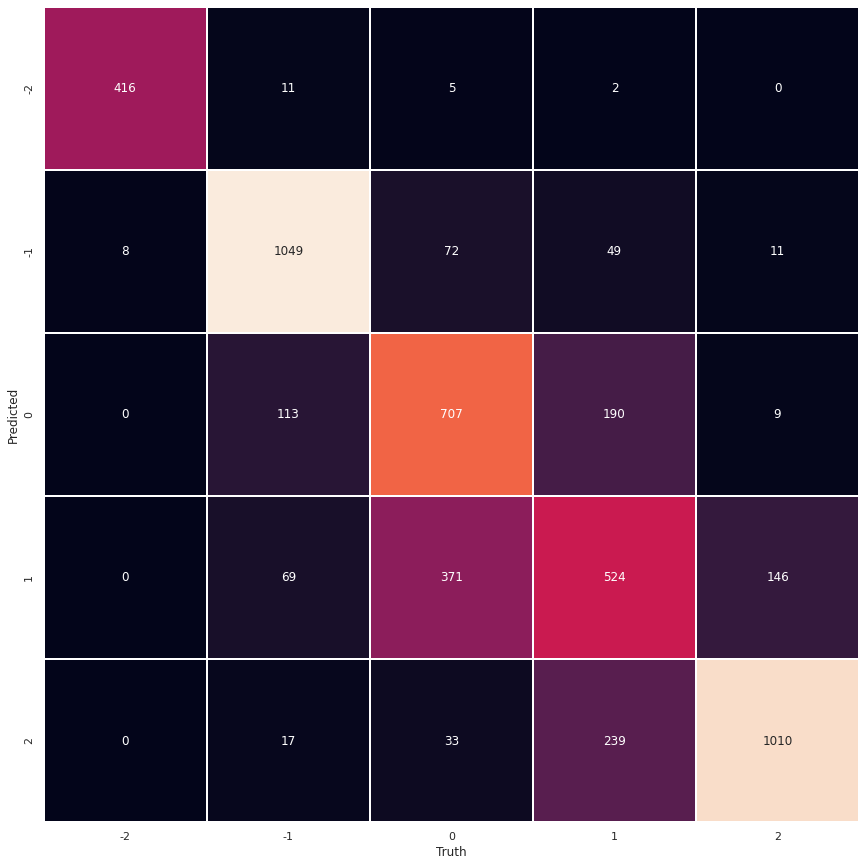

In [104]:
NN_preds = [np.argmax(each) for each in pred]
NN_matrix = confusion_matrix(target_test, NN_preds)

sns.set()
plt.figure(figsize = (15, 15))

sns.heatmap(NN_matrix.T,
            square = True,
            annot = True,
            fmt = 'd',
            cbar = False,
            linewidths = .9,
            xticklabels = ['-2', '-1', '0', '1', '2'],
            yticklabels = ['-2', '-1', '0', '1', '2'])

plt.xlabel('Truth')
plt.ylabel('Predicted')

In [105]:
print(classification_report(list(target_test), NN_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       424
           1       0.88      0.83      0.86      1259
           2       0.69      0.60      0.64      1188
           3       0.47      0.52      0.50      1004
           4       0.78      0.86      0.82      1176

    accuracy                           0.73      5051
   macro avg       0.76      0.76      0.76      5051
weighted avg       0.74      0.73      0.73      5051



In [48]:
def make_NN_LSTM(x_train, y_train, x_test, y_test, vocab_size, embedding_dim=64, epochs=5):

    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=MAX_SEQUENCES),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
    ])

    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    print()
    history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.25,
                    batch_size=32)
    
    predicted_texts = model.predict(x_test)

    loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
    print("Training Accuracy: {:.4f}".format(accuracy))
    loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
    print("Testing Accuracy:  {:.4f}".format(accuracy))
    clear_session()

    return history, predicted_texts

In [49]:
pred_lstm = []
hist_lstm, pred_lstm = make_NN_LSTM(train_sequences_padded, target_train, test_sequences_padded, target_test, vocab_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 320, 64)           1013376   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,040,453
Trainable params: 1,040,453
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
474/474 - 128s - loss: 1.1187 - accuracy: 0.5305 - val_loss: 0.7551 - val_accuracy: 0.6939 - 128s/epoc

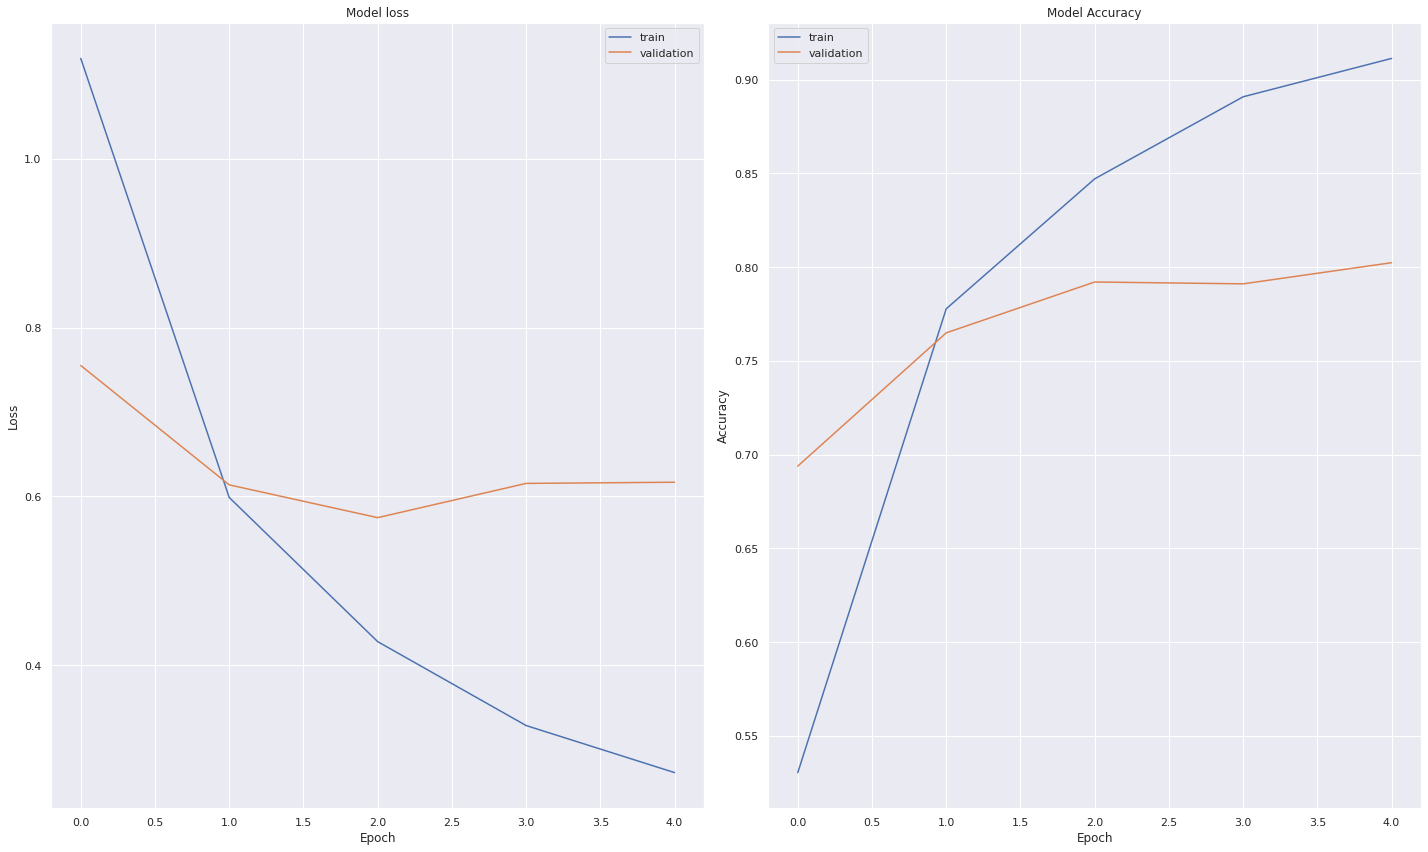

In [50]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 24))

df_loss_acc = pd.DataFrame(hist_lstm.history)
df_loss= df_loss_acc[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'}, inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].copy(deep=True)
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'}, inplace=True)

df_loss.plot(ax=ax1, title='Model loss', figsize=(20,12)).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(ax=ax2, title='Model Accuracy',figsize=(20,12)).set(xlabel='Epoch', ylabel='Accuracy')

figure.tight_layout()

Text(122.30000000000001, 0.5, 'Predicted')

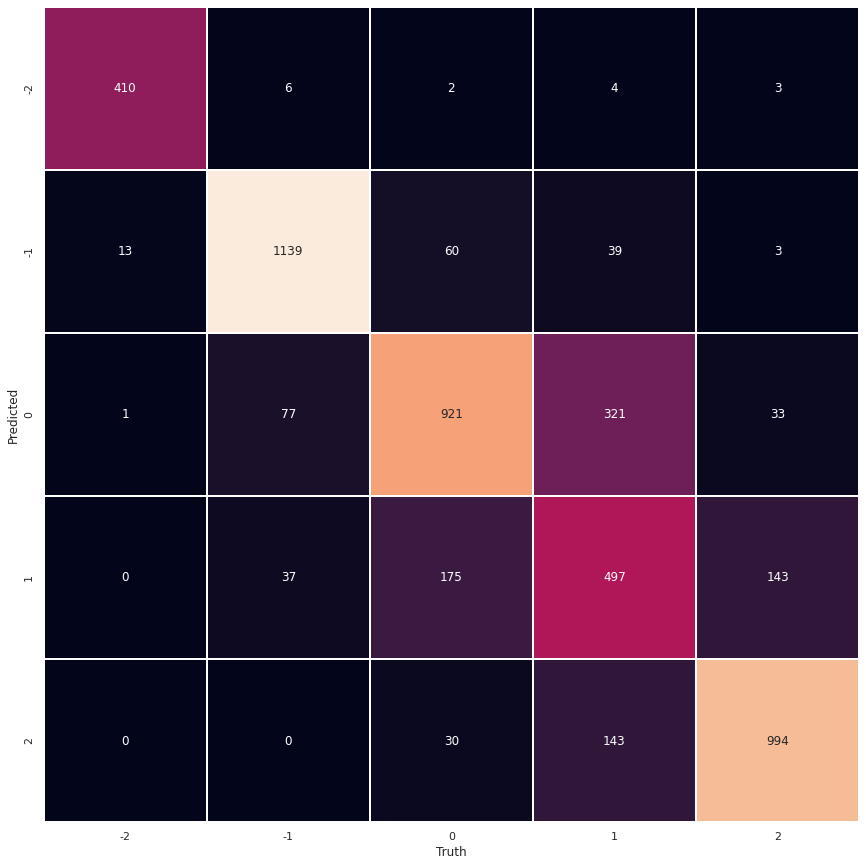

In [51]:
NN_preds_lstm = [np.argmax(each) for each in pred_lstm]
NN_matrix = confusion_matrix(target_test, NN_preds_lstm)

sns.set()
plt.figure(figsize = (15, 15))

sns.heatmap(NN_matrix.T,
            square = True,
            annot = True,
            fmt = 'd',
            cbar = False,
            linewidths = .9,
            xticklabels = ['-2', '-1', '0', '1', '2'],
            yticklabels = ['-2', '-1', '0', '1', '2'])

plt.xlabel('Truth')
plt.ylabel('Predicted')

In [52]:
print(classification_report(list(target_test), NN_preds_lstm))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       424
           1       0.91      0.90      0.91      1259
           2       0.68      0.78      0.72      1188
           3       0.58      0.50      0.54      1004
           4       0.85      0.85      0.85      1176

    accuracy                           0.78      5051
   macro avg       0.80      0.80      0.80      5051
weighted avg       0.78      0.78      0.78      5051

